In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import desc

from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measure = Base.classes.measurement
Station = Base.classes.station



In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

#session.query(measure.station, measure.date).order_by(desc(measure.date)).first()

most_recent = session.query(measure.station, measure.date).order_by(desc(measure.date)).first()
recent_date = session.query(measure.date).order_by(desc(measure.date)).first()

print(recent_date)
print(most_recent)

('2017-08-23',)
('USC00519397', '2017-08-23')


In [10]:
#testing query
#print(session.query(measure))

In [11]:
recent = session.query(measure.station, measure.date).order_by(desc(measure.date))

#recent_day = pd.DataFrame(recent)

recent_df = pd.DataFrame(recent)

#Testing variable
#recent_df.head(20)

#Testing variable
#recent_df['date'] = pd.to_datetime(recent_df['date'], format='%Y%m%d')

#Converting date column to integer format
#recent_day['date'] = recent_day['date'].astype(int)
recent_df['date'] = recent_df['date'].str.replace(r'\D', '').astype(int)

#Converting date to date format
#recent_df['date'] = pd.to_datetime(recent_df['date'], format='%Y%m%d')

recent_df.head(20)

,station,date
0,USC00519397,20170823
1,USC00514830,20170823
2,USC00519523,20170823
3,USC00516128,20170823
4,USC00519397,20170822
5,USC00519523,20170822
6,USC00516128,20170822
7,USC00519397,20170821
8,USC00514830,20170821
9,USC00519523,20170821


In [12]:
print (recent_df.dtypes)

station    object
date        int32
dtype: object


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
engine.execute('SELECT * FROM Station LIMIT 12').fetchall()



[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
engine.execute('SELECT * FROM measurement LIMIT 12').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0)]

In [15]:
# Calculate the date one year from the last date in data set.
#one_year_ago = dt.date(recent_df[1][1]) - dt.timedelta(days=365)
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#one_year_ago = dt.datetime.strptime(recent_date[0], "%Y-%m-%d")- dt.timedelta(days=366)
print(one_year_ago)

2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores

prcp_data = session.query(measure.date, measure.prcp).\
    filter(measure.date > one_year_ago).\
    order_by(measure.date).all()

print(prcp_data)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df.head(20)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [18]:
# Sort the dataframe by date
sorted_prcp_data_df = prcp_data_df.sort_values(by="date", ascending=False, na_position="first")
sorted_prcp_data_df.head(20)

,date,prcp
2222,2017-08-23,0.45
2221,2017-08-23,0.08
2220,2017-08-23,0.00
2219,2017-08-23,0.00
2218,2017-08-22,0.50
2217,2017-08-22,0.00
2216,2017-08-22,0.00
2215,2017-08-21,0.56
2214,2017-08-21,NaN
2213,2017-08-21,0.02


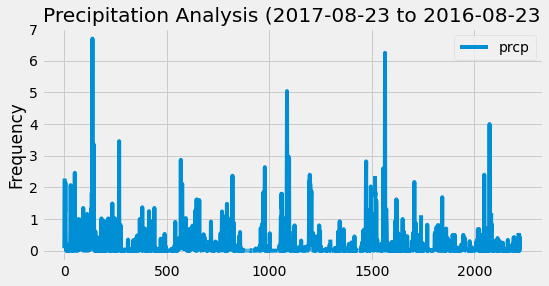

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = prcp_data_df.plot(figsize=(8,4))
ax.set_title(f"Precipitation Analysis ({recent_date[0]} to {one_year_ago}")
ax.set_ylabel('Frequency')
plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcp_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(measure).group_by(measure.station).count()
print("There are {} stations available.".format(num_stations))

There are 9 stations available.


In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(measure.station, func.count(measure.station).label("count")).group_by(measure.station).order_by(desc("count")).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measure.station, func.count(measure.station).label('count')).group_by(measure.station).order_by(desc("count")).limit(1)[0][0]
most_active


'USC00519281'

In [24]:
temp = [func.min(measure.tobs),func.max(measure.tobs),func.avg(measure.tobs)]
session.query(*temp).filter(measure.station==most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [25]:
#testing variable
#temp_obs = session.query(measure.tobs).order_by(desc(measure.date)).all()


#temp_obs = session.query(measure.date, measure.tobs).filter(measure.station==most_active).filter(measure.date >= one_year_ago).order_by(desc(measure.date)).all()
temp_obs1 = session.query(measure.date, measure.station, measure.tobs).filter(measure.date >= one_year_ago).all()
temp_obs_df = pd.DataFrame(temp_obs1)

#temp_obs_df = pd.DataFrame(temp_obs)
#temp_obs_df.head(20)

temp_obs_df["station"].unique()



array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00519523', 'USC00519281', 'USC00516128'], dtype=object)

In [29]:
temp_obs2_df = temp_obs_df.loc[temp_obs_df["station"]!="USC00519281"]
#temp_obs2_df.head(20)
temp_obs2_df["station"].unique()


array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00519523', 'USC00516128'], dtype=object)

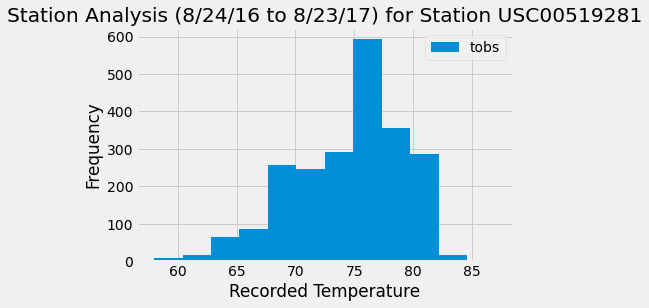

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temp_obs_df['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + most_active)
plt.legend(["tobs"])
plt.show()

# Close session

In [28]:
# Close Session
session.close()